In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import dask.dataframe as dd
import vaex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.preprocessing import OneHotEncoder
import shap

In [95]:
df = dd.read_csv('preprocessed.csv',encoding='utf-8')
train_data=pd.read_csv('train_df.csv',encoding='utf-8')
test_data=pd.read_csv('test_df.csv',encoding='utf-8')

In [96]:
df.head()

,admi_cty_no,card_tpbuz_cd,amt,cnt,TOTAL_POPULATION,운영점포평균영업기간,폐업점포평균영업기간,상권변동지표구분
0,41210510,D05,633562,28,13850.98,188.5,358.0,HH
1,41210510,D11,171040,28,13850.98,188.5,358.0,HH
2,41210510,F02,12060758,375,13850.98,188.5,358.0,HH
3,41210510,Q01,1818710,9,13850.98,188.5,358.0,HH
4,41210510,Q15,2167723,87,13850.98,188.5,358.0,HH


In [29]:
len(df)

134360

In [25]:
df['상권변동지표구분'].isna().sum().compute()

59006

In [97]:
df2 = df.dropna(subset=['상권변동지표구분'])

In [28]:
df2.isna().sum().compute()

admi_cty_no         0
card_tpbuz_cd       0
amt                 0
cnt                 0
TOTAL_POPULATION    0
운영점포평균영업기간          0
폐업점포평균영업기간          0
상권변동지표구분            0
dtype: int64

In [99]:
# df2= df2.drop(columns=['ta_ymd'])

In [31]:
len(df2)

75354

In [34]:
# df3 = df2.sort_values(by=['admi_cty_no','card_tpbuz_cd'])

In [100]:
df2.head()

,admi_cty_no,card_tpbuz_cd,amt,cnt,TOTAL_POPULATION,운영점포평균영업기간,폐업점포평균영업기간,상권변동지표구분
0,41210510,D05,633562,28,13850.98,188.5,358.0,HH
1,41210510,D11,171040,28,13850.98,188.5,358.0,HH
2,41210510,F02,12060758,375,13850.98,188.5,358.0,HH
3,41210510,Q01,1818710,9,13850.98,188.5,358.0,HH
4,41210510,Q15,2167723,87,13850.98,188.5,358.0,HH


In [ ]:
# 해당 행정동, 업종의 월별 매출 총합 -> 매출액

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

In [101]:
df2 = df2.compute()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 기본 통계 분석
print(df.describe())

# 2. amt 열의 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], kde=True)
plt.title('Distribution of amt')
plt.xlabel('amt')
plt.ylabel('Frequency')
plt.show()

# 3. 상관관계 분석
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 4. 범주형 변수와 amt 간의 관계 분석
# admi_cty_no와 amt의 관계
plt.figure(figsize=(12, 6))
sns.boxplot(x='admi_cty_no', y='amt', data=df)
plt.title('amt by admi_cty_no')
plt.xlabel('admi_cty_no')
plt.ylabel('amt')
plt.show()

# card_tpbuz_cd와 amt의 관계
plt.figure(figsize=(12, 6))
sns.boxplot(x='card_tpbuz_cd', y='amt', data=df)
plt.title('amt by card_tpbuz_cd')
plt.xlabel('card_tpbuz_cd')
plt.ylabel('amt')
plt.xticks(rotation=90)
plt.show()

# 상권변동지표구분과 amt의 관계
plt.figure(figsize=(12, 6))
sns.boxplot(x='상권변동지표구분', y='amt', data=df)
plt.title('amt by 상권변동지표구분')
plt.xlabel('상권변동지표구분')
plt.ylabel('amt')
plt.show()

# 수치형 변수와 amt 간의 산점도
numeric_columns = ['cnt', 'TOTAL_POPULATION', '운영점포평균영업기간', '폐업점포평균영업기간']
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='amt', data=df)
    plt.title(f'amt vs {col}')
    plt.xlabel(col)
    plt.ylabel('amt')
    plt.show()

In [69]:
plt.rcParams['font.family'] = 'NanumGothic'
# 상권변동지표 구분으로 그룹화하고 amt의 합계를 계산
grouped_data = df2_pd.groupby('상권변동지표구분')['amt'].sum().reset_index()
gd2 = grouped_data[(grouped_data['card_tpbuz_cd']=='F02')&&(grouped_data['admi_cty_no']==41210510)]
# 시각화 스타일 설정
sns.set(style="whitegrid")

# 막대 그래프 생성
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data, x='상권변동지표구분', y='amt', palette="viridis")
plt.title('상권변동지표 구분별 amt 합계', fontsize=16)
plt.xlabel('상권변동지표 구분', fontsize=14)
plt.ylabel('amt 합계', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# 값 표시
# for index, row in grouped_data.iterrows():
#     plt.text(index, row['amt'], f"{int(row['amt'])}", color='black', ha="center", va="bottom")

plt.show()

SyntaxError: invalid syntax (3686381290.py, line 4)

Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.


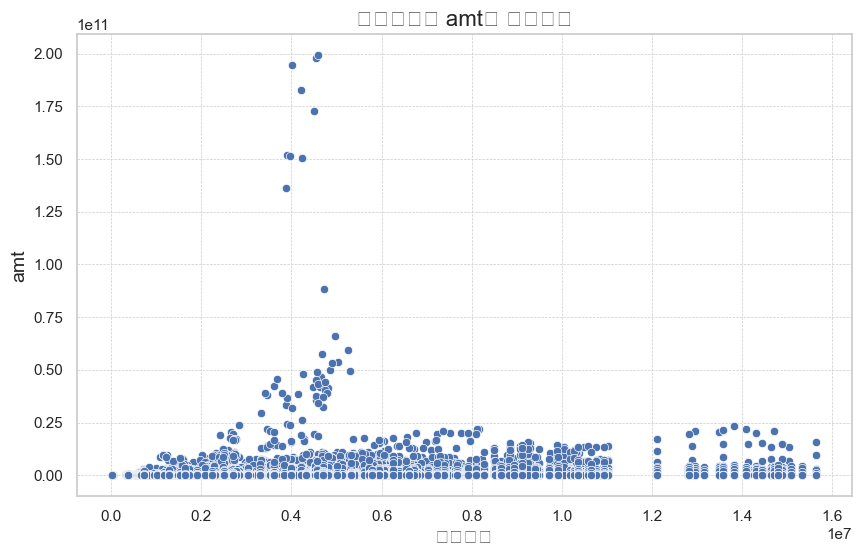

유동인구와 amt의 상관계수: 0.07515790621186662


In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2_pd, x='TOTAL_POPULATION', y='amt')
plt.title('유동인구와 amt의 상관관계', fontsize=16)
plt.xlabel('유동인구', fontsize=14)
plt.ylabel('amt', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

# 상관계수 계산
correlation = df2_pd[['TOTAL_POPULATION', 'amt']].corr().iloc[0, 1]
print(f'유동인구와 amt의 상관계수: {correlation}')

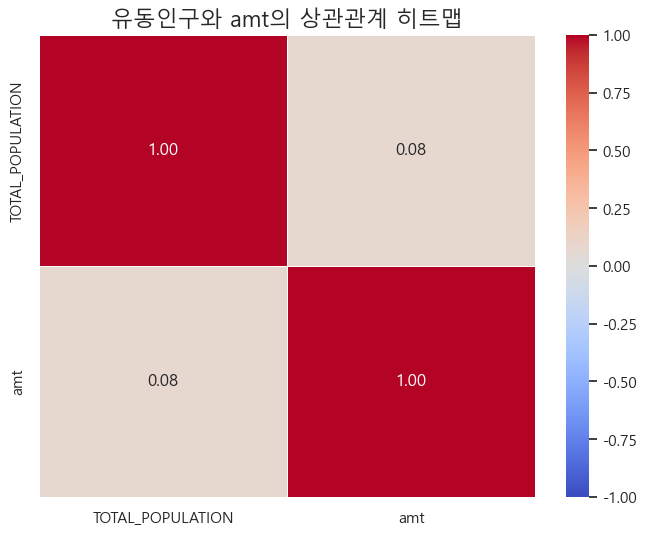

In [75]:
# 필요한 열 선택
selected_columns = df2_pd[['TOTAL_POPULATION', 'amt']]

# 상관행렬 계산
corr_matrix = selected_columns.corr()

# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title('유동인구와 amt의 상관관계 히트맵', fontsize=16)
plt.show()

In [78]:
df2.columns

Index(['admi_cty_no', 'card_tpbuz_cd', 'amt', 'cnt', 'TOTAL_POPULATION',
       '운영점포평균영업기간', '폐업점포평균영업기간', '상권변동지표구분'],
      dtype='object')

In [79]:
data = df2.drop(columns=['card_tpbuz_cd', '상권변동지표구분'])

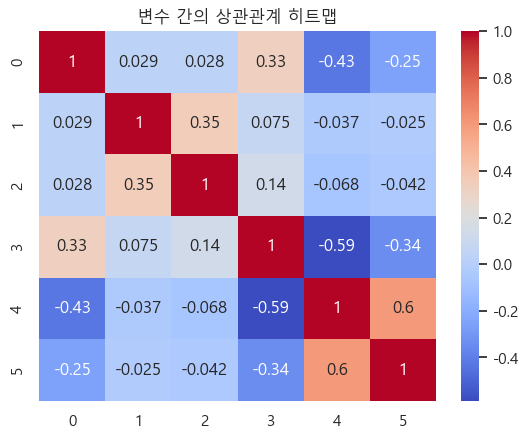

In [80]:
corr = data.corr()

# Heatmap 그리기
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('변수 간의 상관관계 히트맵')
plt.show()


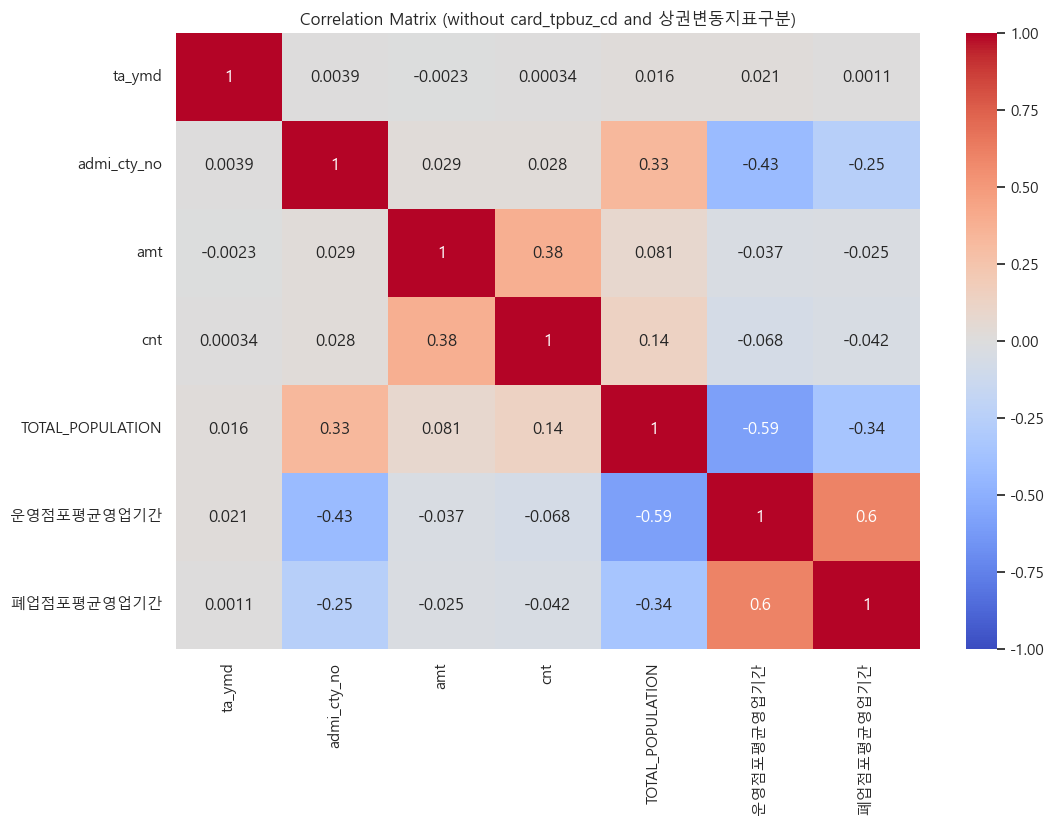

In [87]:
df_corr = df.drop(columns=['card_tpbuz_cd', '상권변동지표구분'])
correlation_matrix = df_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Correlation Matrix (without card_tpbuz_cd and 상권변동지표구분)')
plt.show()

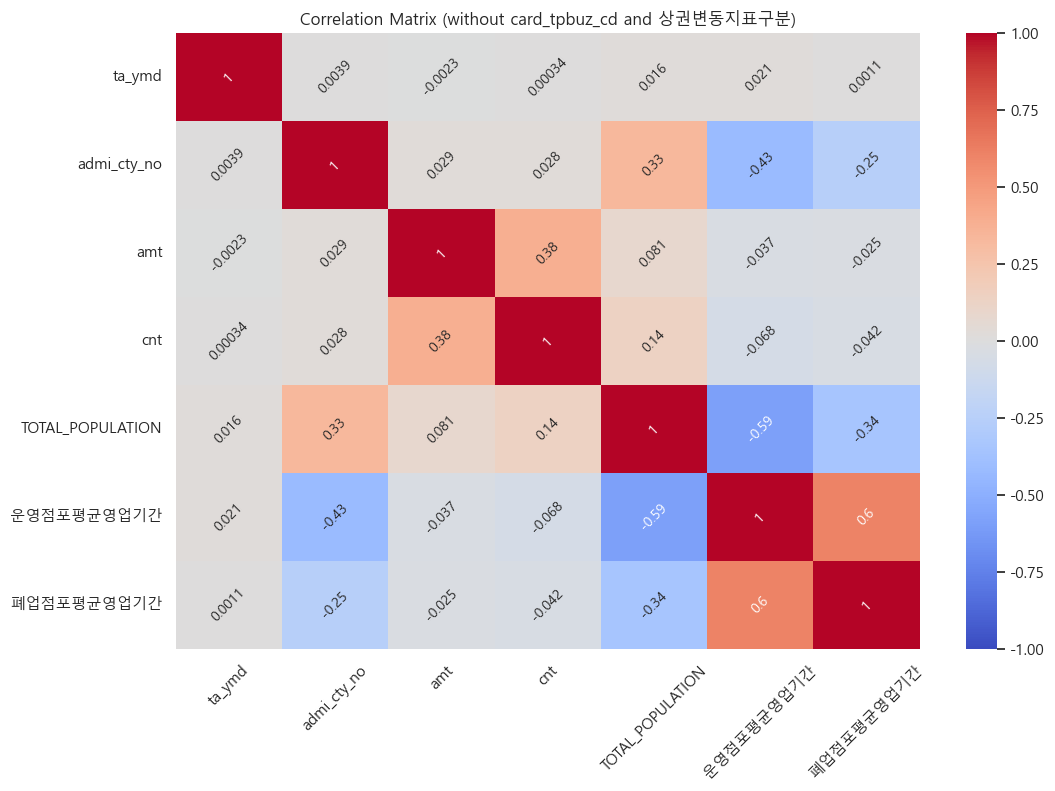

In [88]:
# 3. 상관관계 분석 (card_tpbuz_cd와 상권변동지표구분 제외)
df_corr = df.drop(columns=['card_tpbuz_cd', '상권변동지표구분'])
correlation_matrix = df_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
            annot_kws={"size": 10, "rotation": 45})
plt.title('Correlation Matrix (without card_tpbuz_cd and 상권변동지표구분)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

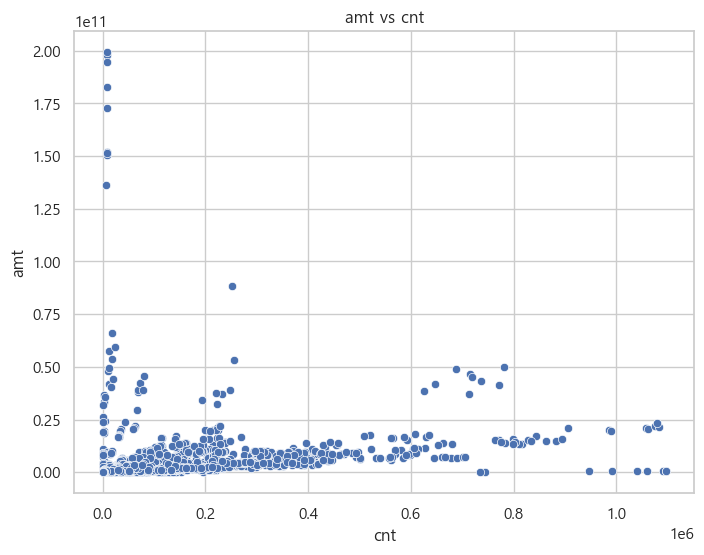

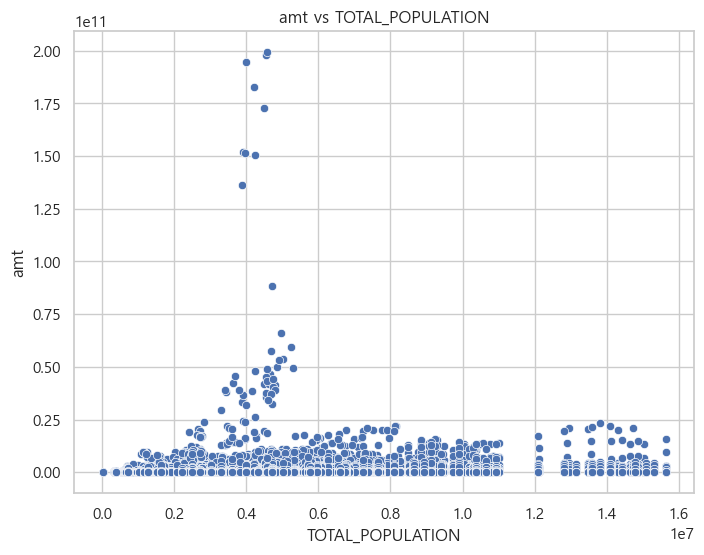

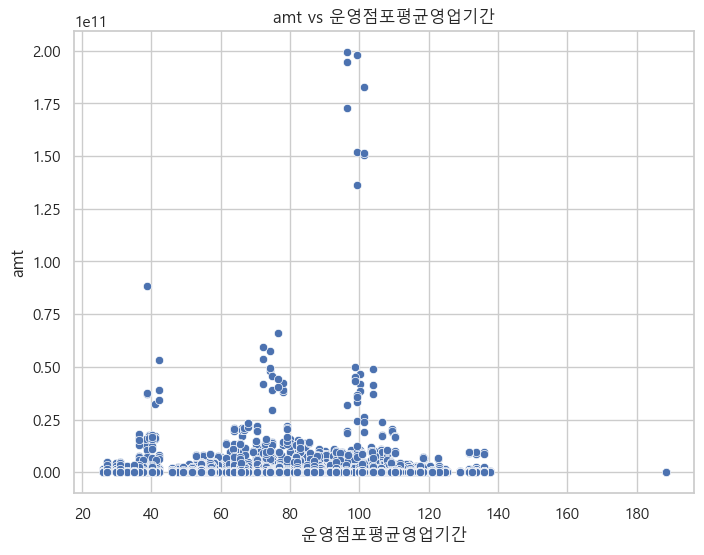

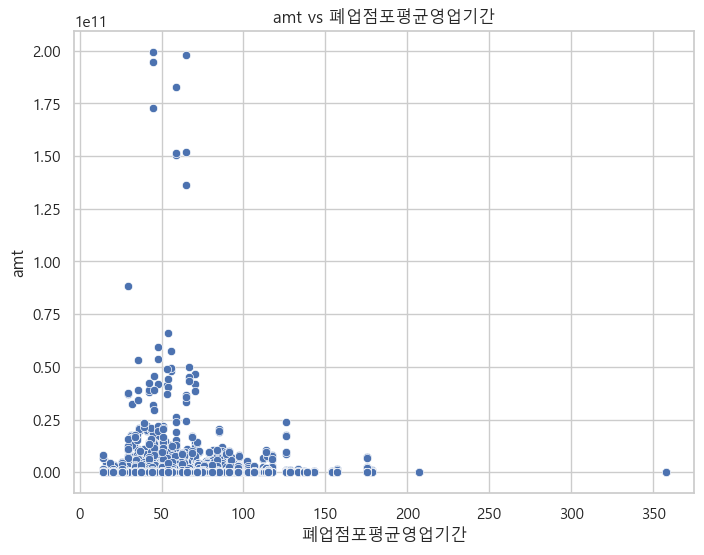

In [102]:
# 수치형 변수와 amt 간의 산점도
numeric_columns = ['cnt', 'TOTAL_POPULATION', '운영점포평균영업기간', '폐업점포평균영업기간']
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='amt', data=df2)
    plt.title(f'amt vs {col}')
    plt.xlabel(col)
    plt.ylabel('amt')
    plt.show()

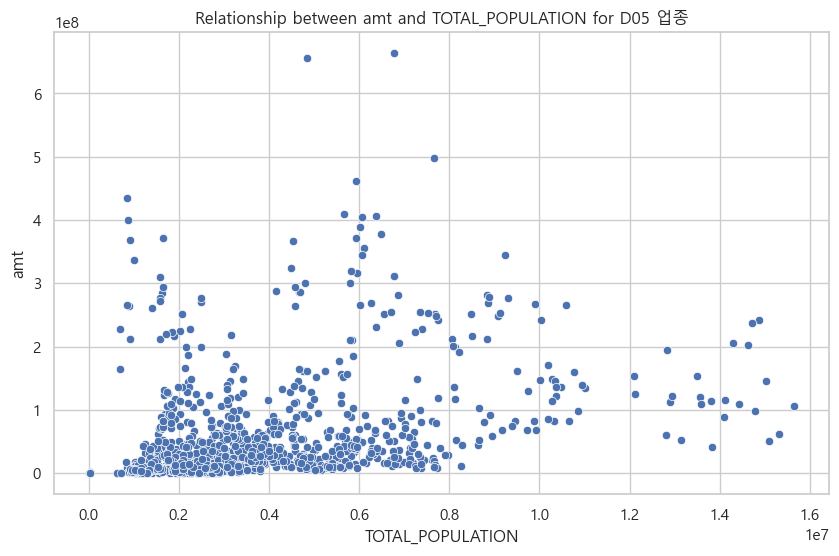

Correlation between amt and TOTAL_POPULATION for D05 업종: 0.37


In [103]:
# 'D05' 업종의 데이터 필터링
df_d05 = df2[df2['card_tpbuz_cd'] == 'D05']

# 매출과 유동인구 간의 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TOTAL_POPULATION', y='amt', data=df_d05)
plt.title('Relationship between amt and TOTAL_POPULATION for D05 업종')
plt.xlabel('TOTAL_POPULATION')
plt.ylabel('amt')
plt.show()

# 매출과 유동인구 간의 상관계수 계산
correlation = df_d05['TOTAL_POPULATION'].corr(df_d05['amt'])
print(f'Correlation between amt and TOTAL_POPULATION for D05 업종: {correlation:.2f}')

Correlation between amt and TOTAL_POPULATION for D05 업종: 0.37


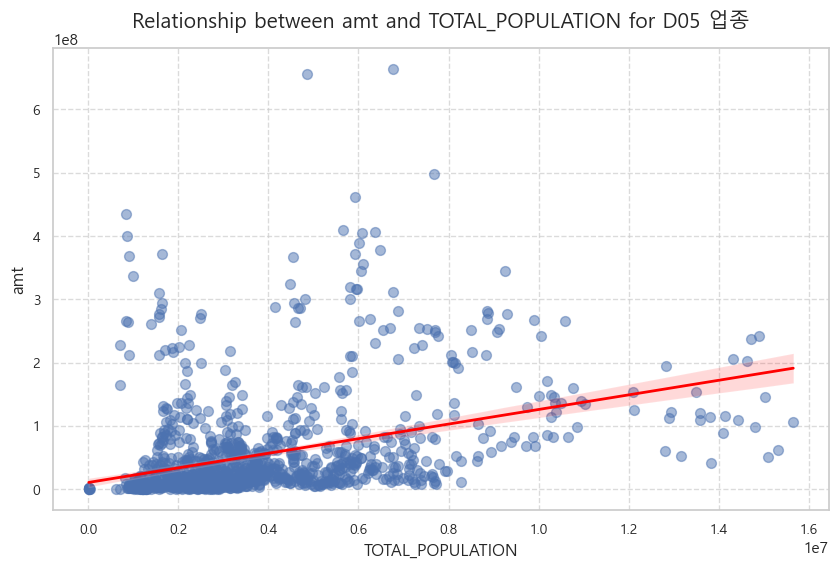

In [104]:
# 'card_tpbuz_cd'가 'D05'인 데이터만 필터링
df_d05 = df2[df2['card_tpbuz_cd'] == 'D05']

# 매출과 유동인구 간의 상관계수 계산
correlation = df_d05['TOTAL_POPULATION'].corr(df_d05['amt'])
print(f'Correlation between amt and TOTAL_POPULATION for D05 업종: {correlation:.2f}')

# 매출과 유동인구 간의 산점도 및 회귀선 그리기
plt.figure(figsize=(10, 6))
sns.regplot(x='TOTAL_POPULATION', y='amt', data=df_d05, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red', 'lw': 2})
plt.title('Relationship between amt and TOTAL_POPULATION for D05 업종', fontsize=15, pad=15)
plt.xlabel('TOTAL_POPULATION', fontsize=12)
plt.ylabel('amt', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

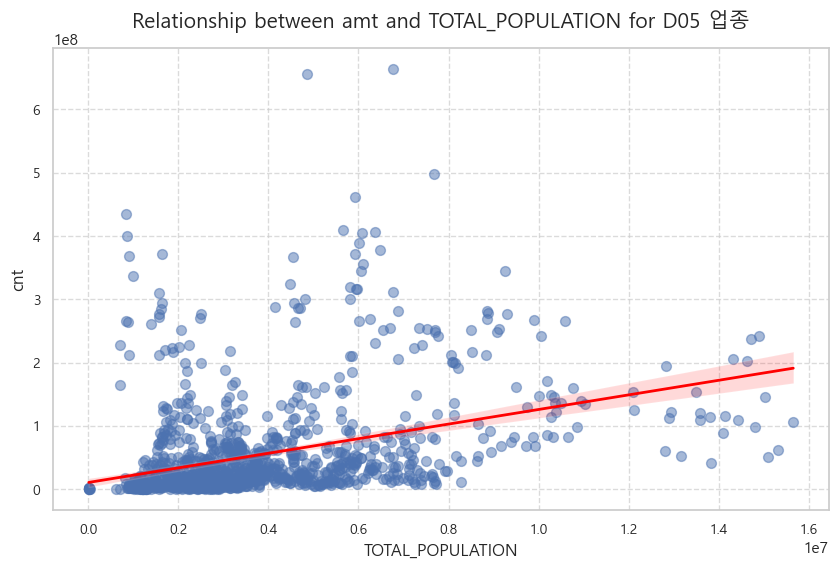

In [105]:
# 'card_tpbuz_cd'가 'D05'인 데이터만 필터링
df_d05 = df2[df2['card_tpbuz_cd'] == 'D05']

# 매출과 유동인구 간의 상관계수 계산
correlation = df_d05['TOTAL_POPULATION'].corr(df_d05['amt'])
print(f'Correlation between amt and TOTAL_POPULATION for D05 업종: {correlation:.2f}')

plt.figure(figsize=(10, 6))
sns.regplot(x='TOTAL_POPULATION', y='amt', data=df_d05, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red', 'lw': 2})
plt.title('Relationship between amt and TOTAL_POPULATION for D05 업종', fontsize=15, pad=15)
plt.xlabel('TOTAL_POPULATION', fontsize=12)
plt.ylabel('amt', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [111]:
df2[df2['card_tpbuz_cd']=='Q04']['amt'].min()

126305

In [112]:
df2[df2['card_tpbuz_cd']=='Q04']

,admi_cty_no,card_tpbuz_cd,amt,cnt,TOTAL_POPULATION,운영점포평균영업기간,폐업점포평균영업기간,상권변동지표구분
33,41210520,Q04,5569644,480,383145.55,121.8,113.2,HH
93,41210540,Q04,225129982,16243,1505126.40,118.1,104.3,HH
146,41210550,Q04,37510996,2164,1221965.65,107.3,109.8,HH
218,41210560,Q04,423767,22,1344132.80,115.9,48.5,HL
256,41210570,Q04,44575560,2248,1941904.02,117.1,78.5,HH
...,...,...,...,...,...,...,...,...
75064,41590590,Q04,248161457,10882,7227381.59,41.4,34.2,LL
75135,41590600,Q04,108577360,5301,5951113.33,40.2,34.0,LL
75202,41590610,Q04,342687546,11239,8651733.54,30.9,25.7,LL
75263,41590620,Q04,16227534,863,3986817.45,34.9,37.4,LL


In [115]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import numpy as np

data = {
    "admi_cty_no": [41210520],
    "card_tpbuz_cd": ["Q04"],
    "amt": [5569644],  # 예측에서는 사용되지 않음
    "cnt": [480], # DB에서 불러오기 
    "TOTAL_POPULATION": [383145.55	], # DB에서 불러오기
    "운영점포평균영업기간": [121.8], # DB에서 불러오기
    "폐업점포평균영업기간": [113.2], # DB에서 불러오기
    "상권변동지표구분": ["HH"] # DB에서 불러오기
}

df_predict = pd.DataFrame(data)
df_predict = TabularDataset(df_predict)

predictor2 = TabularPredictor.load(r"AutogluonModels\ag-20240718_004914")
y_pred = predictor2.predict(df_predict.drop(columns=['amt']))

print("실제값: 5569644")
print("예측값:", y_pred.iloc[0])

실제값: 5569644
예측값: 9213865.0
